In [18]:
import glob
import h5py
import pandas as pd

from process_raw_data import smoothed_speed
from src import io, moco, roi, ttl, zdF
import os
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.colors import Normalize

In [15]:
# set main data path
base_data_path = "/Volumes/AhmedLab/princess/data"
exp = 1801

# set experiment file path
processed_path = glob.glob(os.path.join(base_data_path, 'processed', f'*{exp}'))[0]
print(processed_path)

/Volumes/AhmedLab/princess/data/processed/251014_1801


In [21]:
# # making functions to load in files
# def load_clusters(experiment_path):
#     file = glob.glob(f'{experiment_path}/*signals.h5')[0]
#     with h5py.File(file, 'r') as f:
#         cluster_labels = f['labels'][...]
#         df = f['df/f'][...]
#     return cluster_labels, df
#
# def load_acquisition_params(experiment_path):
#     file = glob.glob(f'{experiment_path}/*acquisition_parameters.h5')[0]
#     with h5py.File(file, 'r') as f:
#         scope_fr = f['scope_fr'][...]
#         camera_fr = f['camera_fr'][...]
#         brain_dim = f['brain_dimensions'][...]
#         brain_dim= brain_dim.reshape(-1)
#     return scope_fr, camera_fr, brain_dim
#
# def load_fictrac_data(experiment_path):
#     file = glob.glob(f'{experiment_path}/*fictrac.h5')[0]
#     with h5py.File(file, 'r') as f:
#         smoothed_speed = f['smoothed_speed'][...]
#         xy_pos = f['2d_pos'][...]
#         delta_rot = f['delta_rot'][...]
#     return smoothed_speed, xy_pos, delta_rot

# moved to io

In [36]:
# load in data
cluster_labels, signal = io.load_clusters(processed_path)
scope_fr, camera_fr, brain_dim = io.load_acquisition_params(processed_path)
smoothed_speed, xy_pos, delta_rot = io.load_fictrac_data(processed_path)

In [10]:
# convert maui and behavior time
frames = [x for x in range(1, signal.shape[-1])]
volume_per_s = scope_fr/signal.shape[0] # volume rate in Hz
maui_time = [0] + [x / volume_per_s for x in frames]



In [11]:
# vis features
div_cmap = sns.color_palette('coolwarm', as_cmap=True)
sing_cmap = sns.color_palette('light:b', as_cmap=True)
color = 'b'

In [16]:
print(signal.shape)

(31, 1000, 978)


In [21]:
signal[13,100].shape

(978,)

<function matplotlib.pyplot.show(close=None, block=None)>

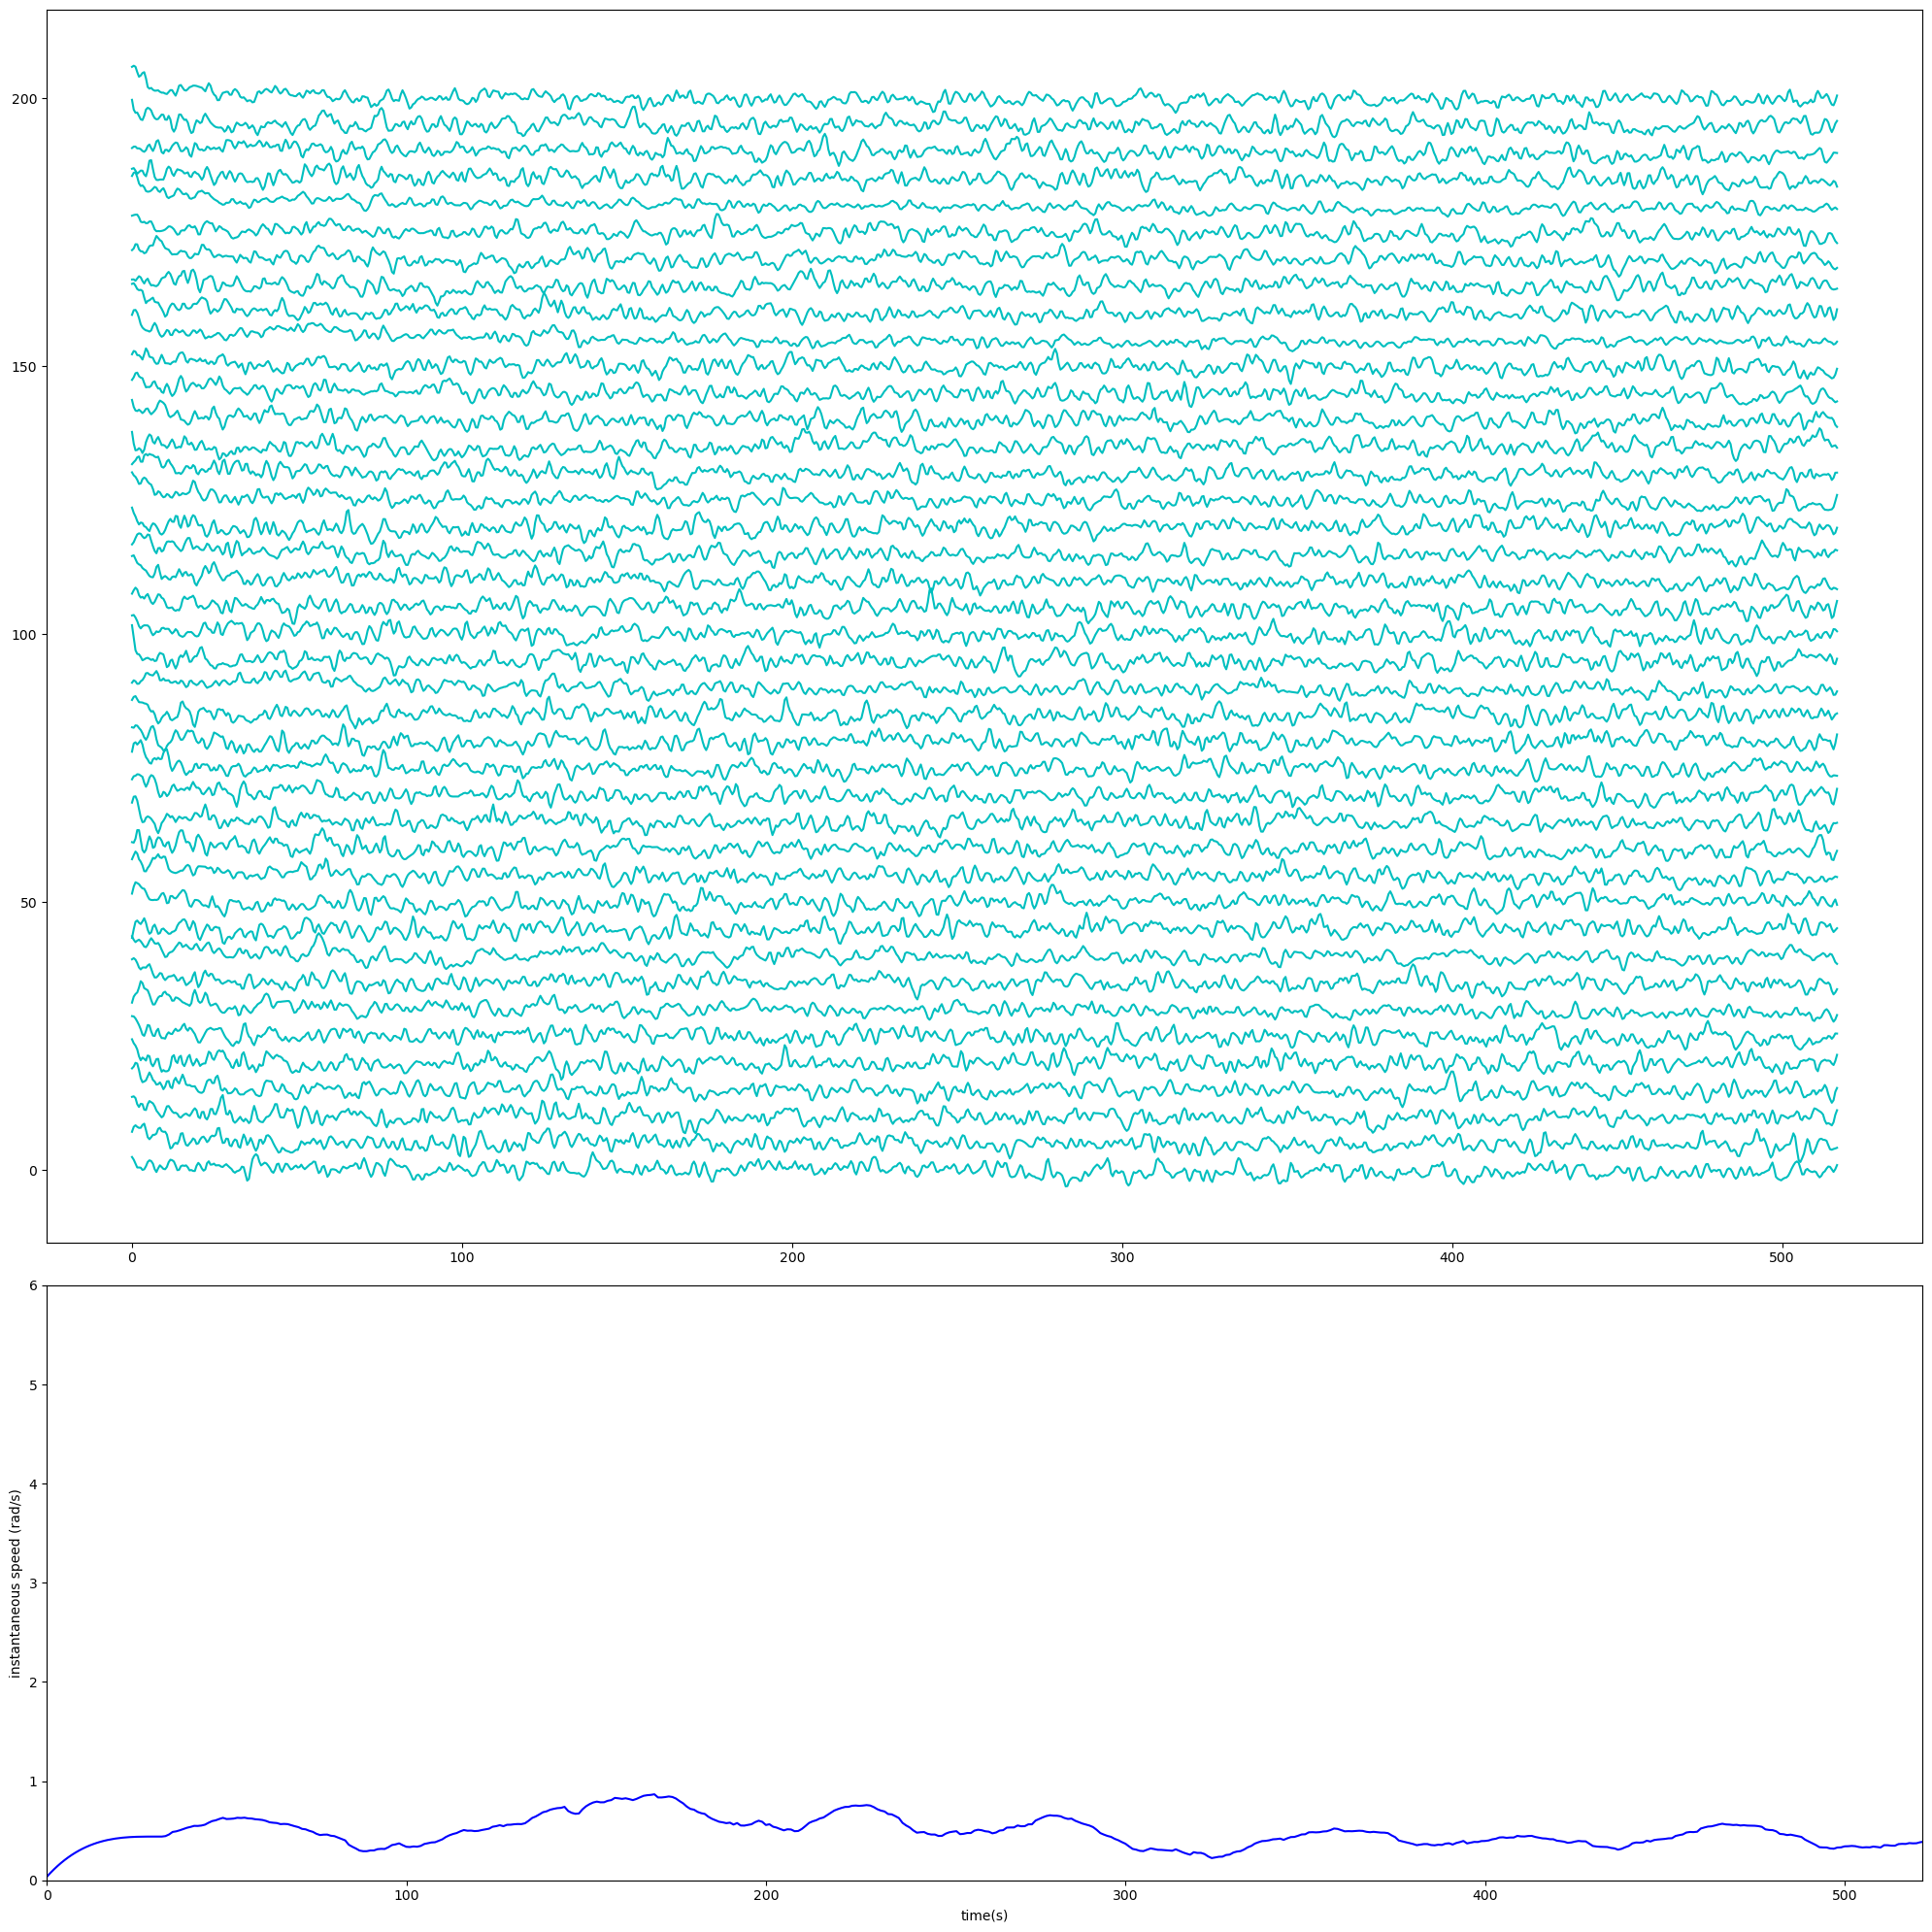

In [37]:
fig0 = plt.figure(figsize=(20,20))
gs = GridSpec(nrows=3, ncols=1, figure=fig0)

y_shift = 5
roi_n = 40

ax0 = fig0.add_subplot(gs[0:2,:])
single_slice = signal[13]
for idx, roi in enumerate(single_slice):
    trace = roi + (y_shift*idx)
    ax0.plot(maui_time, trace, color='c')
    if idx == roi_n:
        break

ax1 = fig0.add_subplot(gs[2, :])
ax1.plot(smoothed_speed, color=color)
plt.ylim(0,6)
plt.xlim(xmin=0, xmax=max(maui_time)+5)
plt.xlabel('time(s)')
plt.ylabel('instantaneous speed (rad/s)')

fig0.tight_layout()
plt.show

In [ ]:
# plotting z-scored df/F traces of individual ROIs
# plots highest correlated ROIs

fig0 = plt.figure(figsize=(20,20))
gs = GridSpec(nrows=3, ncols=1, figure=fig0)

mean_corr = []
y_shift = 5
roi_n = 40

ax0 = fig0.add_subplot(gs[0:2,:])
for idx, cluster_idx in enumerate(sorted_pearson):
    trace = signal_reshape[cluster_idx, :] + (y_shift*idx)
    ax0.plot(maui_time, trace, color='c')
    mean_corr.append(pearson_arr[cluster_idx])
    if idx == roi_n:
        break
plt.title(fr'average Pearson correlation coefficient = {np.mean(mean_corr):.2f}', loc = 'left')
plt.xlim(xmin=0, xmax=max(maui_time)+5)
plt.ylabel('top 20 correlated rois')

ax1 = fig0.add_subplot(gs[2, :])
ax1.plot(fic_time, fictrac_sp, color=color)
plt.ylim(0,6)
plt.xlim(xmin=0, xmax=max(maui_time)+5)
plt.xlabel('time(s)')
plt.ylabel('instantaneous speed (rad/s)')

fig0.tight_layout()
fig0.savefig(fr'{experiment_path}/rawzCa_{exp_num}.svg')
plt.show